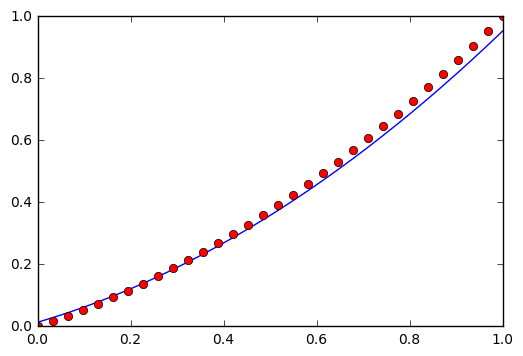

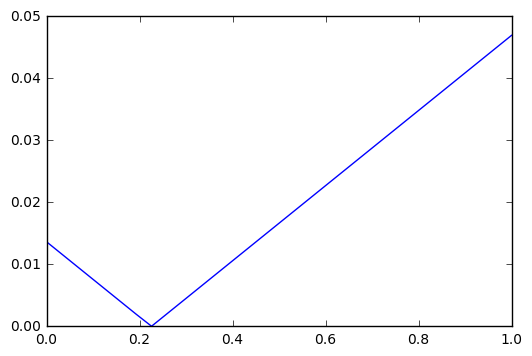

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def rhs(x):
    return 0*x + 1

def exact_solution(x):
    return 0.5*x*(x+1)

# Setup Parameters
xL = 0; xR = 1; nx = 2**5;
h = (xR - xL) / (nx - 1);
h2 = h**2;
# Grid Data
x = np.linspace(xL,xR,nx);
ua = exact_solution(x);
#print(x)

# Poisson Matrix & r.h.s. vector definition
A = np.zeros(shape=(nx, nx));
A[0][0] = -2;
A[0][1] = 1;
A[nx-1][nx-2] = 1;
A[nx-1][nx-1] = -2;
for k in range(2,nx):
    #print(k, A[k][k-2:k+1])
    A[k-1][k-2:k+1] = np.array([1, -2, 1]);

#print
#print(A)
# Right hand side
f = h**2 * rhs(x);
f[nx-1] = f[nx-1] - 1;
# Solve
u = np.linalg.solve(A,f);

#print(u)

# Plot
plt.figure(1)
plt.plot(x, u, x, ua, 'ro')
#plt.ylabel('some numbers')
#plt.show()

plt.figure(2)
plt.plot(x, np.abs(u-ua))
#plt.ylabel('some numbers')
plt.show()